<a href="https://colab.research.google.com/github/PreciousGemstone/CSSI-97-Project-insert_team_name-/blob/main/Copy_of_Project_linear_regression_no_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [19]:
def three_metrics(y_test, y_pred):

  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)


  print("Mean Squared Error: " + str(mse))
  print("Mean Absolute Error: " + str(mae))
  print("r2 score: " + str(r2))

In [20]:
#@title get_data function
def get_data():
  data = 'https://raw.githubusercontent.com/PreciousGemstone/CSSI-97-Project-insert_team_name-/refs/heads/main/laptop_prices.csv'
  laptop = pd.read_csv(data)


  improved_laptop = laptop.drop(['Product','Company','TypeName','OS', 'CPU_company', 'GPU_company', 'CPU_model',
                               'GPU_model','Touchscreen', 'PrimaryStorageType','SecondaryStorageType','Screen', 'RetinaDisplay','IPSpanel'],axis=1)

  laptop_prices = improved_laptop[['Price_euros']]
  improved_laptop_features = improved_laptop.drop('Price_euros', axis=1)

  X, y = improved_laptop_features.values, laptop_prices.values
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 30)
  return(X_train, X_test, y_train, y_test, improved_laptop, laptop_prices)

In [21]:
X_train, X_test, y_train, y_test, improved_laptop, laptop_prices = get_data()

# model training

In [22]:
lin_reg_l1 = LassoCV(cv=5, random_state=0)
lin_reg_l1.fit(X_train, y_train)

pred = lin_reg_l1.predict(X_test)

print("\n")

three_metrics(y_test, pred)



Mean Squared Error: 217238.93238696593
Mean Absolute Error: 324.14786649748646
r2 score: 0.6514659978027219


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:1664: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


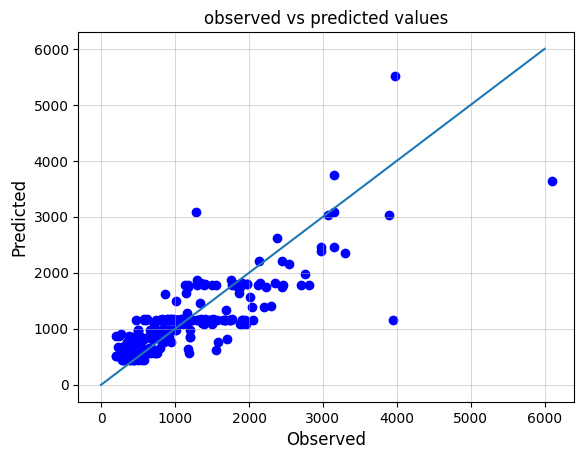

In [23]:
x = np.linspace(-5, 6000, 1000)
y=x
plt.scatter(y_test, pred, color='blue', marker='o', label='Data')
plt.title("observed vs predicted values", fontsize=12)
plt.xlabel("Observed", fontsize=12)
plt.ylabel("Predicted", fontsize=12)

plt.grid(True, linewidth=0.7, alpha=0.5)
plt.plot(x,y)

ridge and standard model

In [24]:
lin_reg_l2 = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1, 2, 5, 10, 15, 20, 25, 50, 100])
lin_reg_l2.fit(X_train, y_train)

pred = lin_reg_l2.predict(X_test)

three_metrics(y_test, pred)

Mean Squared Error: 207272.60871223573
Mean Absolute Error: 308.069317506482
r2 score: 0.667455777532258


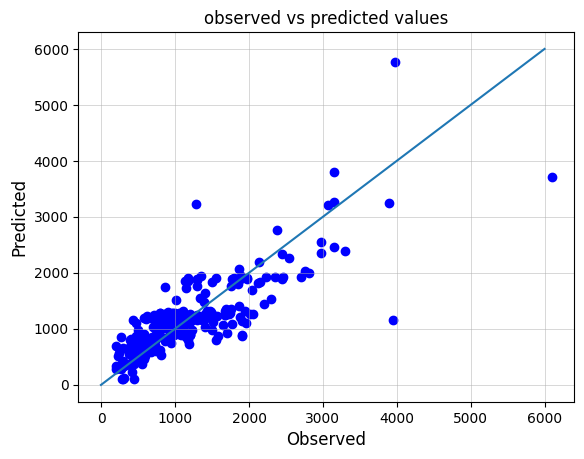

In [25]:
x = np.linspace(-5, 6000, 1000)
y=x
plt.scatter(y_test, pred, color='blue', marker='o', label='Data')
plt.title("observed vs predicted values", fontsize=12)
plt.xlabel("Observed", fontsize=12)
plt.ylabel("Predicted", fontsize=12)

plt.grid(True, linewidth=0.7, alpha=0.5)
plt.plot(x,y)

In [26]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

pred = lin_reg.predict(X_test)

three_metrics(y_test, pred)

Mean Squared Error: 207198.5803059034
Mean Absolute Error: 308.10052581495813
r2 score: 0.6675745472962769


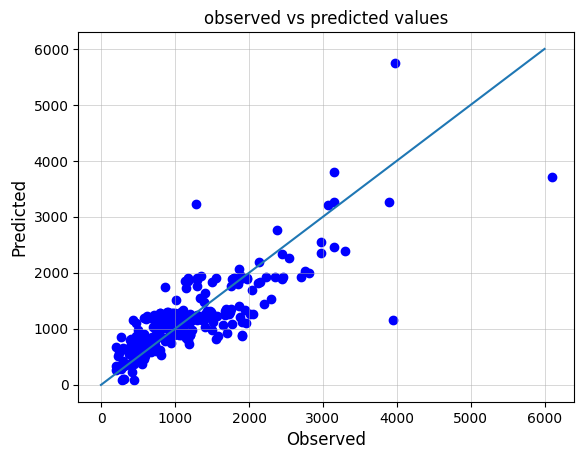

In [27]:
x = np.linspace(-5, 6000, 1000)
y=x
plt.scatter(y_test, pred, color='blue', marker='o', label='Data')
plt.title("observed vs predicted values", fontsize=12)
plt.xlabel("Observed", fontsize=12)
plt.ylabel("Predicted", fontsize=12)

plt.grid(True, linewidth=0.7, alpha=0.5)
plt.plot(x,y)